### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [2]:
profile = pandas_profiling.ProfileReport(purchase_data)

In [3]:
profile

## Player Count

* Display the total number of players


In [4]:
total_players = len(purchase_data["SN"].unique())
total_players

576

## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [5]:
unique_items = len(purchase_data["Item ID"].unique())
average_price = purchase_data["Price"].mean()
number_purchases = purchase_data["Purchase ID"].count()
total_revenue = purchase_data["Price"].sum()

purchasing_analytics = pd.DataFrame({"Number of Unique Items" : [unique_items],
                              "Average Price" : average_price,
                              "Number of Purchases" : number_purchases,
                              "Total Revenue" : total_revenue})
purchasing_analytics

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,3.050987,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [6]:
reduced_purchase_data = purchase_data.drop_duplicates("SN")

grouped_purchase_data = reduced_purchase_data.groupby(['Gender'])

gender_counts = grouped_purchase_data["SN"].count()

percentages = (gender_counts/total_players)* 100

gender_demographics = pd.DataFrame({"Total Count" : gender_counts,
                              "Percentage of Players" : percentages})
gender_demographics





,Total Count,Percentage of Players
Gender,,
Female,81,14.062500
Male,484,84.027778
Other / Non-Disclosed,11,1.909722


([<matplotlib.axis.XTick at 0x7ff490c833d0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Other')])

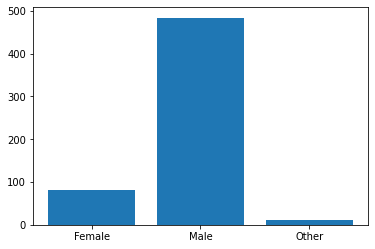

In [7]:
x_axis = np.arange(len(gender_counts))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,gender_counts)
plt.xticks(tick_locations, ["Female", "Male", "Other"])

([<matplotlib.patches.Wedge at 0x7ff450989990>,
 [Text(0.9943882224357877, 0.4703106027733103, 'Female'),
  Text(-1.0207987863571348, -0.40984123483588236, 'Male'),
  Text(1.0980208834537473, -0.06595558732550631, 'Other')],
 [Text(0.542393575874066, 0.25653305605816923, '14.1%'),
  Text(-0.5567993380129825, -0.2235497644559358, '84.0%'),
  Text(0.5989204818838622, -0.035975774904821615, '1.9%')])

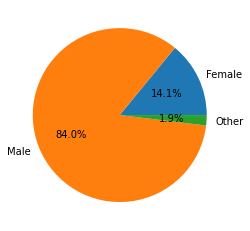

In [8]:
plt.pie(gender_counts, labels = ["Female", "Male", "Other"],autopct="%1.1f%%")


## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [9]:
grouped_purchase_data = purchase_data.groupby(['Gender'])
purchase_count = grouped_purchase_data["Purchase ID"].count()
gender_totals = grouped_purchase_data["Price"].sum()
gender_avg_per_person = gender_totals / gender_counts

grouped_purchase_data = purchase_data.groupby(['Gender'])
avg_purchase_price = grouped_purchase_data["Price"].mean()

purchasing_analytics = pd.DataFrame({"Purchase Count": purchase_count,
                                    "Average Purchase Price" : avg_purchase_price,
                                    "Total Purchae Value" : gender_totals,
                                    "Avg Total Purchase per Person" : gender_avg_per_person})
purchasing_analytics


,Purchase Count,Average Purchase Price,Total Purchae Value,Avg Total Purchase per Person
Gender,,,,
Female,113,3.203009,361.94,4.468395
Male,652,3.017853,1967.64,4.065372
Other / Non-Disclosed,15,3.346000,50.19,4.562727


([<matplotlib.patches.Wedge at 0x7ff4b0c0da10>,
 [Text(0.9768065992299, 0.50581505286114, 'Male'),
  Text(-1.0081525648909146, -0.4400322782522553, 'Female'),
  Text(1.0975863938078867, -0.0728293081650423, 'Other')],
 [Text(0.5328035995799454, 0.27589911974243997, '15.2%'),
  Text(-0.549901399031408, -0.24001760631941196, '82.7%'),
  Text(0.5986834875315745, -0.039725077180932156, '2.1%')])

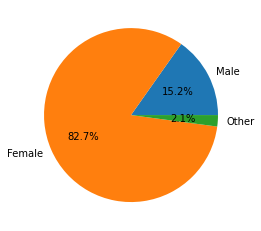

In [10]:
plt.pie(gender_totals, labels = ['Male', "Female", "Other"], autopct = "%1.1f%%" )

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [11]:
bins = [-1,9,14,19,24,29,34,39,100]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
purchase_data["Age Group"] = pd.cut(reduced_purchase_data["Age"], bins, labels=group_names)


grouped_by_ages = purchase_data.groupby(['Age Group'])
ages = grouped_by_ages["Age"].count()
percent_ages = (ages/ total_players)*100

age_demographics = pd.DataFrame({"Number in Group" : ages,
                                "Percent in Group" : percent_ages})
age_demographics


,Number in Group,Percent in Group
Age Group,,
<10,17,2.951389
10-14,22,3.819444
15-19,107,18.576389
20-24,258,44.791667
25-29,77,13.368056
30-34,52,9.027778
35-39,31,5.381944
40+,12,2.083333


In [12]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    return ct.plot(kind='bar', stacked=True)

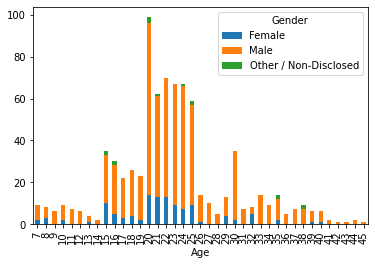

In [13]:
plot_bar(purchase_data, 'Age', 'Gender')
plt.show()

([<matplotlib.axis.XTick at 0x7ff4a10ef690>,
 [Text(0, 0, '<10'),
  Text(1, 0, '10-14'),
  Text(2, 0, '15-19'),
  Text(3, 0, '20-24'),
  Text(4, 0, '25-29'),
  Text(5, 0, '30-34'),
  Text(6, 0, '35-39'),
  Text(7, 0, '40+')])

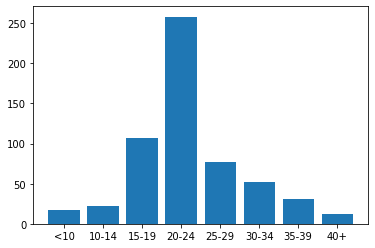

In [14]:
x_axis = np.arange(len(ages))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, ages)
plt.xticks(tick_locations, labels = group_names)

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [15]:
bins = [-1,9,14,19,24,29,34,39,100]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]
purchase_data["Age Group"] = pd.cut(purchase_data["Age"], bins, labels=group_names)
grouped_by_ages = purchase_data.groupby(['Age Group'])
purchase_count = grouped_by_ages.count()
avg_purchase_price = grouped_by_ages["Price"].mean()

purchase_counts = grouped_by_ages["SN"].count()
total_purchase_value = grouped_by_ages["Price"].sum()
avg_purchase_price = total_purchase_value/ purchase_counts
avg_total_per_person = total_purchase_value / ages

purchase_analytics = pd.DataFrame({"Purchase Counts": purchase_counts,
                                  "Average Purchase Price" : avg_purchase_price,
                                  "Total Purchase Value": total_purchase_value,
                                  "Average Total Per Person" : avg_total_per_person})
purchase_analytics


,Purchase Counts,Average Purchase Price,Total Purchase Value,Average Total Per Person
Age Group,,,,
<10,23,3.353478,77.13,4.537059
10-14,28,2.956429,82.78,3.762727
15-19,136,3.035956,412.89,3.858785
20-24,365,3.052219,1114.06,4.318062
25-29,101,2.900990,293.00,3.805195
30-34,73,2.931507,214.00,4.115385
35-39,41,3.601707,147.67,4.763548
40+,13,2.941538,38.24,3.186667


([<matplotlib.axis.XTick at 0x7ff481830290>,
 [Text(0, 0, '<10'),
  Text(1, 0, '10-14'),
  Text(2, 0, '15-19'),
  Text(3, 0, '20-24'),
  Text(4, 0, '25-29'),
  Text(5, 0, '30-34'),
  Text(6, 0, '35-39'),
  Text(7, 0, '40+')])

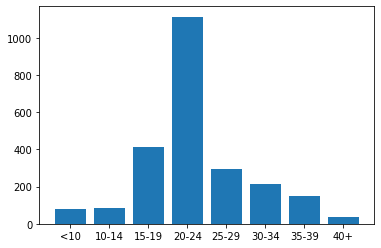

In [16]:
x_axis = np.arange(len(total_purchase_value))
plt.bar(x_axis, total_purchase_value)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels = group_names)


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [17]:
grouped_by_sn = purchase_data.groupby(['SN'])
average_purchase_price = grouped_by_sn["Price"].mean()
total_purchase_value = grouped_by_sn["Price"].sum()
purchase_count = grouped_by_sn["Purchase ID"].count()

top_spenders = pd.DataFrame({"Purchase Count": purchase_count,
                            "Average Purchase Price" : average_purchase_price,
                            "Total Purchase Value" : total_purchase_value})

top_spenders.sort_values(by=['Total Purchase Value'],ascending = False).head()


,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Idastidru52,4,3.862500,15.45
Chamjask73,3,4.610000,13.83
Iral74,4,3.405000,13.62
Iskadarya95,3,4.366667,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [18]:
item_df = purchase_data[["Item ID", "Item Name", "Price"]]

grouped_by_item = item_df.groupby(["Item Name", "Item ID"])



purchase_count = grouped_by_item["Item ID"].count()
total_purchase_value = grouped_by_item["Price"].sum()

item_price = total_purchase_value / purchase_count

most_popular_item = pd.DataFrame({"Purchase Count" : purchase_count,
                                 "Item Price" : item_price,
                                 "Total Purchase Value" : total_purchase_value})
                                                                                             
sorted_popular_items = most_popular_item.sort_values(by="Purchase Count", ascending = False)

sorted_popular_items.head()

,,Purchase Count,Item Price,Total Purchase Value
Item Name,Item ID,,,
"Oathbreaker, Last Hope of the Breaking Storm",178,12,4.23,50.76
"Extraction, Quickblade Of Trembling Hands",108,9,3.53,31.77
Nirvana,82,9,4.90,44.10
Fiery Glass Crusader,145,9,4.58,41.22
"Pursuit, Cudgel of Necromancy",19,8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [19]:
sorted_total_purchase_value = most_popular_item.sort_values(by="Total Purchase Value", ascending = False)
sorted_total_purchase_value.head()

,,Purchase Count,Item Price,Total Purchase Value
Item Name,Item ID,,,
"Oathbreaker, Last Hope of the Breaking Storm",178,12,4.23,50.76
Nirvana,82,9,4.90,44.10
Fiery Glass Crusader,145,9,4.58,41.22
Final Critic,92,8,4.88,39.04
Singed Scalpel,103,8,4.35,34.80
